# Data Analysis of Auction model

**No average bid increases for sniper bidder, no watch probability**

Sniper bidders' internal valuations are updated by a scalar factor drawn from a unifrom distribution in the range [1.2, 2.0]

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Global variable (which was used in the batch runs)
AUCTION_LENGTH = 100

In [2]:
legacy_df = pd.read_csv("../data/results_legacy_no_bidincrease_sniper_no_watchproba.csv", index_col=0)

## Getting final row of each epoch

I.e., winning bids of each epoch

In [3]:
splits = np.where(legacy_df["Highest Bid"] == 0)[0]
splits = np.delete(splits, 0)
splits = np.append(splits, len(legacy_df["Highest Bid"]-1))
final_rows = splits - 1
print(final_rows)

[    100     201     302 ... 1009797 1009898 1009999]


In [4]:
final_prices_df = legacy_df.iloc[final_rows]
# Removing any rows which contain 0 or None
# These are edge cases where the model does not receive any bids in the first few timesteps
final_prices_df.drop(final_prices_df.index[np.where(final_prices_df["Highest Bid"] == 0)[0]], axis=0, inplace=True)

C:\Users\Will\AppData\Local\Temp\ipykernel_23888\1367672686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_prices_df.drop(final_prices_df.index[np.where(final_prices_df["Highest Bid"] == 0)[0]], axis=0, inplace=True)


### Plotting histograms of winning bids

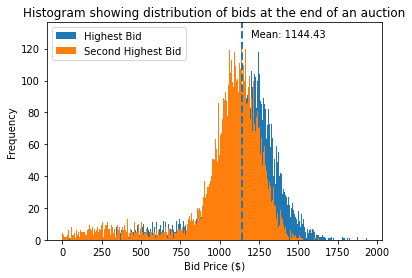

In [5]:
final_prices_df.plot.hist(bins=500)

min_ylim, max_ylim = plt.ylim()
plt.axvline(final_prices_df["Highest Bid"].mean(), linestyle='dashed', linewidth=2)
plt.text(final_prices_df["Highest Bid"].mean()*1.05, max_ylim*0.93, 'Mean: {:.2f}'.format(final_prices_df["Highest Bid"].mean()))
plt.title("Histogram showing distribution of bids at the end of an auction")
plt.xlabel("Bid Price ($)")
plt.show()

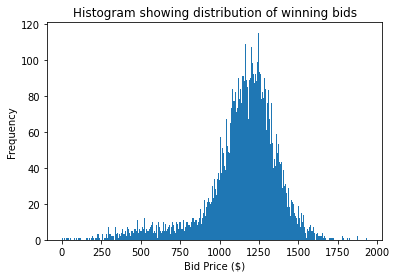

In [6]:
final_prices_df["Highest Bid"].plot.hist(bins=500)
plt.title("Histogram showing distribution of winning bids")
plt.xlabel("Bid Price ($)")
plt.show()

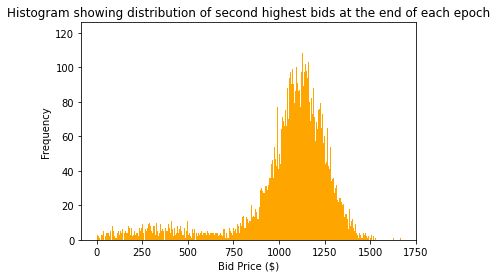

In [7]:
final_prices_df["Second Highest Bid"].plot.hist(bins=500, color="orange")
plt.title("Histogram showing distribution of second highest bids at the end of each epoch")
plt.xlabel("Bid Price ($)")
plt.show()

## Calculating win ratio of EarlyBidder : SniperBidder

In [8]:
earlyBidderWinPercent = 100 * (len(np.where(final_prices_df["Highest Bidder"] == "EarlyBidder")[0]) / len(final_prices_df["Highest Bidder"]))
sniperBidderWinPercent = 100 - earlyBidderWinPercent

In [9]:
print(f'EarlyBidder win percentage: {earlyBidderWinPercent:.2f}%')
print(f'SniperBidder win percentage: {sniperBidderWinPercent:.2f}%')

EarlyBidder win percentage: 60.70%
SniperBidder win percentage: 39.30%


## Finding sniper bidder wins

Plus calculating the percentage difference between the 1st and 2nd highest bids

In [10]:
sniper_bidder_wins = final_prices_df.iloc[np.where(final_prices_df["Highest Bidder"] == "SniperBidder")[0]]

In [11]:
sniper_bidder_curse = 100 * (sniper_bidder_wins["Highest Bid"] - sniper_bidder_wins["Second Highest Bid"]) / sniper_bidder_wins["Second Highest Bid"]
print(sniper_bidder_curse)

302        39.434589
403         5.180814
908        30.561970
1009        7.268721
1413        6.477749
             ...    
1009090    28.678427
1009191     4.373703
1009292     0.360280
1009494    12.677616
1009595     1.657218
Length: 3930, dtype: float64


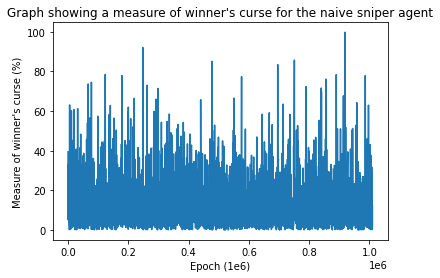

In [12]:
sniper_bidder_curse.plot()
plt.title("Graph showing a measure of winner's curse for the naive sniper agent")
plt.xlabel("Epoch (1e6)")
plt.ylabel("Measure of winner's curse (%)")
plt.show()

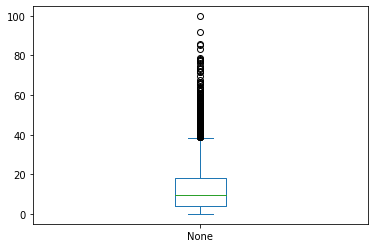

In [13]:
sniper_bidder_curse.plot.box()
plt.show()

In [14]:
mean_sniper_curse = np.mean(sniper_bidder_curse)
print(f'Mean sniper bidder curse: {mean_sniper_curse}')
median_sniper_curse = np.median(sniper_bidder_curse)
print(f'Median sniper bidder curse: {median_sniper_curse}')

Mean sniper bidder curse: 13.011095240709832
Median sniper bidder curse: 9.468902289895354


## Finding early bidder wins

Plus calculating the percentage difference between the 1st and 2nd highest bids

In [15]:
early_bidder_wins = final_prices_df.iloc[np.where(final_prices_df["Highest Bidder"] == "EarlyBidder")[0]]

In [16]:
early_bidder_curse = 100 * (early_bidder_wins["Highest Bid"] - early_bidder_wins["Second Highest Bid"]) / early_bidder_wins["Second Highest Bid"]
print(early_bidder_curse)

100          3.713103
201         68.949498
504          1.454762
605          2.250121
706         16.736327
              ...    
1009393    141.747662
1009696    101.008049
1009797      7.348970
1009898      0.894557
1009999     12.372042
Length: 6070, dtype: float64


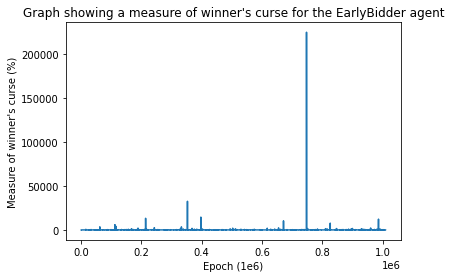

In [24]:
early_bidder_curse.plot()
plt.title("Graph showing a measure of winner's curse for the EarlyBidder agent")
plt.xlabel("Epoch (1e6)")
plt.ylabel("Measure of winner's curse (%)")
plt.show()

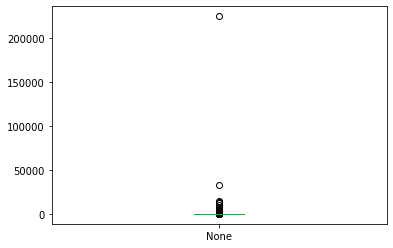

In [25]:
early_bidder_curse.plot.box()
plt.show()

In [26]:
mean_early_bidder_curse = np.mean(early_bidder_curse)
print(f'Mean early bidder curse: {mean_early_bidder_curse}')
median_early_bidder_curse = np.median(early_bidder_curse)
print(f'Median early bidder curse: {median_early_bidder_curse}')

Mean early bidder curse: 79.96740302022694
Median early bidder curse: 4.147826660662304


## Finding mean auction bid (highest and second highest) at each timestep

In [20]:
mean_bids = legacy_df.groupby(np.arange(len(legacy_df))%(AUCTION_LENGTH+1)).mean()
print(f'Mean winning bid (all agents): {mean_bids["Highest Bid"][len(mean_bids)-1]}')

Mean winning bid (all agents): 1144.4324491064267


In [21]:
mean_sniper_bidder_win = sniper_bidder_wins["Highest Bid"].mean()
mean_early_bidder_win = early_bidder_wins["Highest Bid"].mean()

print(f'Mean winning bid (SniperBidder): {mean_sniper_bidder_win}')
print(f'Mean winning bid (EarlyBidder): {mean_early_bidder_win}')

Mean winning bid (SniperBidder): 1247.6545698527405
Mean winning bid (EarlyBidder): 1077.6016526429976


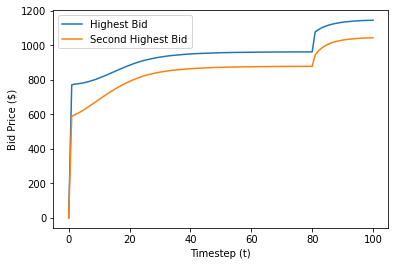

In [22]:
mean_bids.plot()
plt.ylabel("Bid Price ($)")
plt.xlabel("Timestep (t)")
plt.show()

The noticeable jump from timestep 80 onwards characterises the SniperBidders being activated (for this dataset, bidTimeframe was set to 20). 

Notice how this strategy (i.e., not using average bid increase) results in bidders paying a high premium ($1144 on average vs $1055 for the bid-increase strategy).
- However, SniperBidders win much more frequently using the no bid increase strategy compared to those who use it (39.30% vs 13.18%)